# Sklearn

## 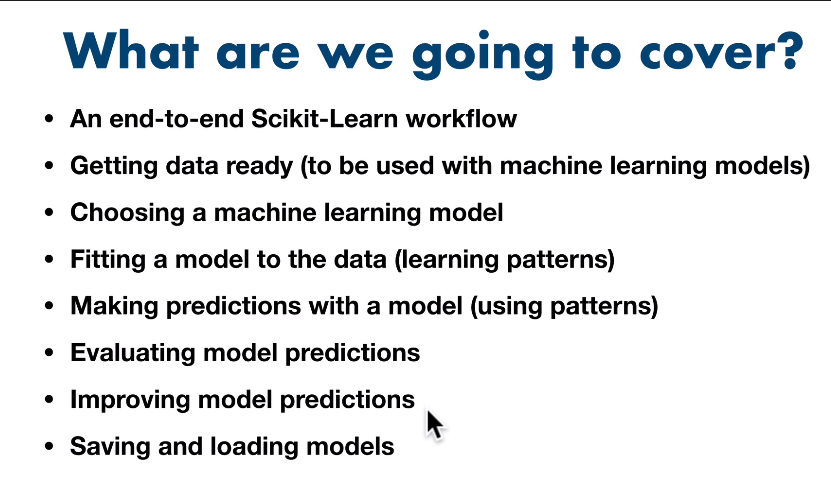

- estimator = model/algorithm

## 0. Standard library import
For all machine learning projects, you'll oftern see these libraries imported

In [1]:
# 1. Getting the data ready
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X = features matrix, data, features variables
X = heart_disease.drop("target", axis=1)

#Create y = target, what I want to model
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparamaters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparamaters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

# 20% of the data is used to the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3


In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction
y_label = clf.predict(np.array[(0, 2, 4, 6)]) 
#np array does not look like X_train!!!
# thats why it does not work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [8]:
X_test # but with test it will, same form (shape)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2


In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [10]:
y_test

180    0
33     1
118    1
45     1
238    0
      ..
202    0
12     1
247    0
80     1
182    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train) 
# 100%!!! but because it has seen all this train data

1.0

In [12]:
clf.score(X_test, y_test) # 75% accuracy, it has never been this data

0.8360655737704918

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[19,  7],
       [ 3, 32]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [16]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%')
    print("")

trying model with 10 estimators...
Model accuracy on test set: 77.05%

trying model with 20 estimators...
Model accuracy on test set: 85.25%

trying model with 30 estimators...
Model accuracy on test set: 90.16%

trying model with 40 estimators...
Model accuracy on test set: 85.25%

trying model with 50 estimators...
Model accuracy on test set: 81.97%

trying model with 60 estimators...
Model accuracy on test set: 85.25%

trying model with 70 estimators...
Model accuracy on test set: 80.33%

trying model with 80 estimators...
Model accuracy on test set: 85.25%

trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [17]:
# 6. Save the Model and Load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

In [19]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1. Getting the data ready to be use using ML

Three main things we have to do :
1) Split the data into features and labels ( usually `X` & `y`)

2) Filling (also called imputing) or disregarding missing values

3) Coverting non-numerical data into integers (also called feature encoding)


In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target", axis=1)

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [26]:
X.head()
X.shape[0]*0.8

242.4

In [27]:
heart_disease.shape

(303, 14)

## 1.1 Making all data numerical!

In [28]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
car_sales.shape

(1000, 5)

In [30]:
car_sales.dtypes
# objects - strings or classes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Split the data into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales.Price

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [33]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


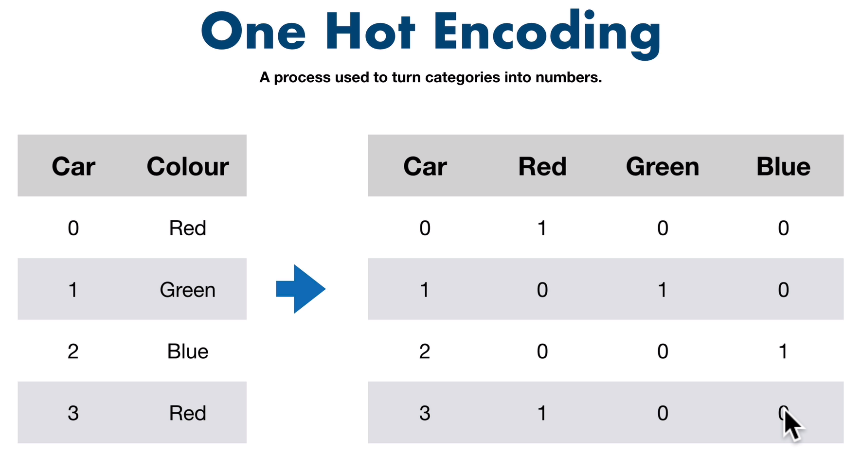

In [34]:
# Turn the categories into numbers
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # not the odometer
one_hot = OneHotEncoder()

#take the onehotenc and apply to cat features
#and for the remainder columns passthrough
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                               remainder='passthrough')

#and fit the transformer into
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_X).head()
# Ododmeter has not been changed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [36]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# Lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
model.score(X_test, y_test) #same code as before, using transformed_X

# but the data is not so good, the features are not so great to predict
# not so correlated to the price (target)

0.3235867221569877

In [40]:
print(sklearn.__version__)

1.0.2


### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the sample with missing data altogether

In [41]:
# Import car_sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing.Price

In [44]:
# Let's try to convert nan to numbers
# Turn the categories into numbers
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # not the odometer
one_hot = OneHotEncoder()

#take the onehotenc and apply to cat features
#and for the remainder columns passthrough
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                               remainder='passthrough')

#and fit the transformer into
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [45]:
car_sales_missing["Doors"].mean()

4.011578947368421

### Option 1: Fill missing data 

In [46]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the colours column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the Ododmeter column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), 
                                          inplace=True)

#Fill the Doors column
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mean(), 
                                   inplace=True)


# check df again
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.000000,4.0,15323.0
1,BMW,Blue,192714.000000,5.0,19943.0
2,Honda,White,84714.000000,4.0,28343.0
3,Toyota,White,154365.000000,4.0,13434.0
4,Nissan,Blue,181577.000000,3.0,14043.0
5,Honda,Red,42652.000000,4.0,23883.0
6,Toyota,Blue,163453.000000,4.0,8473.0
7,Honda,White,131253.237895,4.0,20306.0
8,missing,White,130538.000000,4.0,9374.0
9,Honda,Blue,51029.000000,4.0,26683.0


In [47]:
car_sales_missing.isna().sum() # price is the one we wanna predict
#so we just remove it

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove the rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [49]:
len(car_sales_missing) # we lost some of the information

950

In [50]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing.Price

In [51]:
# Let's try to convert nan to numbers
# Turn the categories into numbers
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # not the odometer
one_hot = OneHotEncoder()

#take the onehotenc and apply to cat features
#and for the remainder columns passthrough
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                               remainder='passthrough')

#and fit the transformer into
transformed_X = transformer.fit_transform(X)
print(transformed_X)

  (0, 1)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 15)	35431.0
  (1, 0)	1.0
  (1, 6)	1.0
  (1, 14)	1.0
  (1, 15)	192714.0
  (2, 1)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 15)	84714.0
  (3, 3)	1.0
  (3, 9)	1.0
  (3, 12)	1.0
  (3, 15)	154365.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 11)	1.0
  (4, 15)	181577.0
  (5, 1)	1.0
  (5, 8)	1.0
  (5, 12)	1.0
  (5, 15)	42652.0
  (6, 3)	1.0
  :	:
  (943, 15)	162523.0
  (944, 0)	1.0
  (944, 6)	1.0
  (944, 11)	1.0
  (944, 15)	163322.0
  (945, 3)	1.0
  (945, 5)	1.0
  (945, 12)	1.0
  (945, 15)	35820.0
  (946, 4)	1.0
  (946, 9)	1.0
  (946, 11)	1.0
  (946, 15)	155144.0
  (947, 2)	1.0
  (947, 6)	1.0
  (947, 12)	1.0
  (947, 15)	66604.0
  (948, 1)	1.0
  (948, 9)	1.0
  (948, 12)	1.0
  (948, 15)	215883.0
  (949, 3)	1.0
  (949, 6)	1.0
  (949, 12)	1.0
  (949, 15)	248360.0


### Option 2. Fill missing values with Sklearn

In [52]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [53]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# drop the rows with no labels

car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#  Split into X and y

X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

In [58]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [59]:
#  Split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and 
# numerical values with mean
# - strategy - for every missing data
# - constant - constant replace the missing data by the string missing
# or the value 4, or the mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create an imputer something that fills missing data
# takes a list of parameters: use the function on the features we want to transform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

#Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [61]:
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                               columns=["Make",
                                        "Colours", "Door", "Odometer (KM)"])

car_sales_filled_train.head()

,Make,Colours,Door,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [62]:
car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                    columns=["Make",
                                    "Colours", "Door", "Odometer (KM)"])
car_sales_filled_test

,Make,Colours,Door,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0
...,...,...,...,...
185,Honda,Green,4.0,165101.0
186,Nissan,Green,3.0,153554.0
187,Toyota,White,4.0,108569.0
188,BMW,Black,3.0,201190.0


In [63]:
car_sales_filled.isna().sum() # no missing values!!

NameError: name 'car_sales_filled' is not defined

In [64]:
car_sales_filled_train

,Make,Colours,Door,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0
...,...,...,...,...
755,Toyota,missing,4.0,218803.0
756,BMW,Blue,5.0,245427.0
757,Toyota,White,4.0,196225.0
758,Honda,Blue,4.0,133117.0


In [65]:
# with the nan gone, we can turn the categories into numbers
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colours", "Door"] # not the odometer
one_hot = OneHotEncoder()

#take the onehotenc and apply to cat features
#and for the remainder columns passthrough
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                               remainder='passthrough')

#fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)

#check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [66]:
# now X is transformed and ready to go, lets see if we can fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

#Make sure to use transformed (filled and one hot data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

### 2. Choosing the right estimator/algorithm/model for the problem

Some things to note:

* Sklearn refers to mechine learning models, algorithm as estimators
* Classification problem - predicting a category (heart diase or not)
    * sometimes we can find `clf` - short for classifier, classification estimator
* Regression problem - predicting a number (selling price of car)

If we are working into a ML learning problem, and want to use Sklearn:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### 2.1 Picking a ML model for a regression regression

In [67]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
housing_df = pd.DataFrame(housing['data'], 
                          columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [69]:
housing_df["target"] = housing['target'] 
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


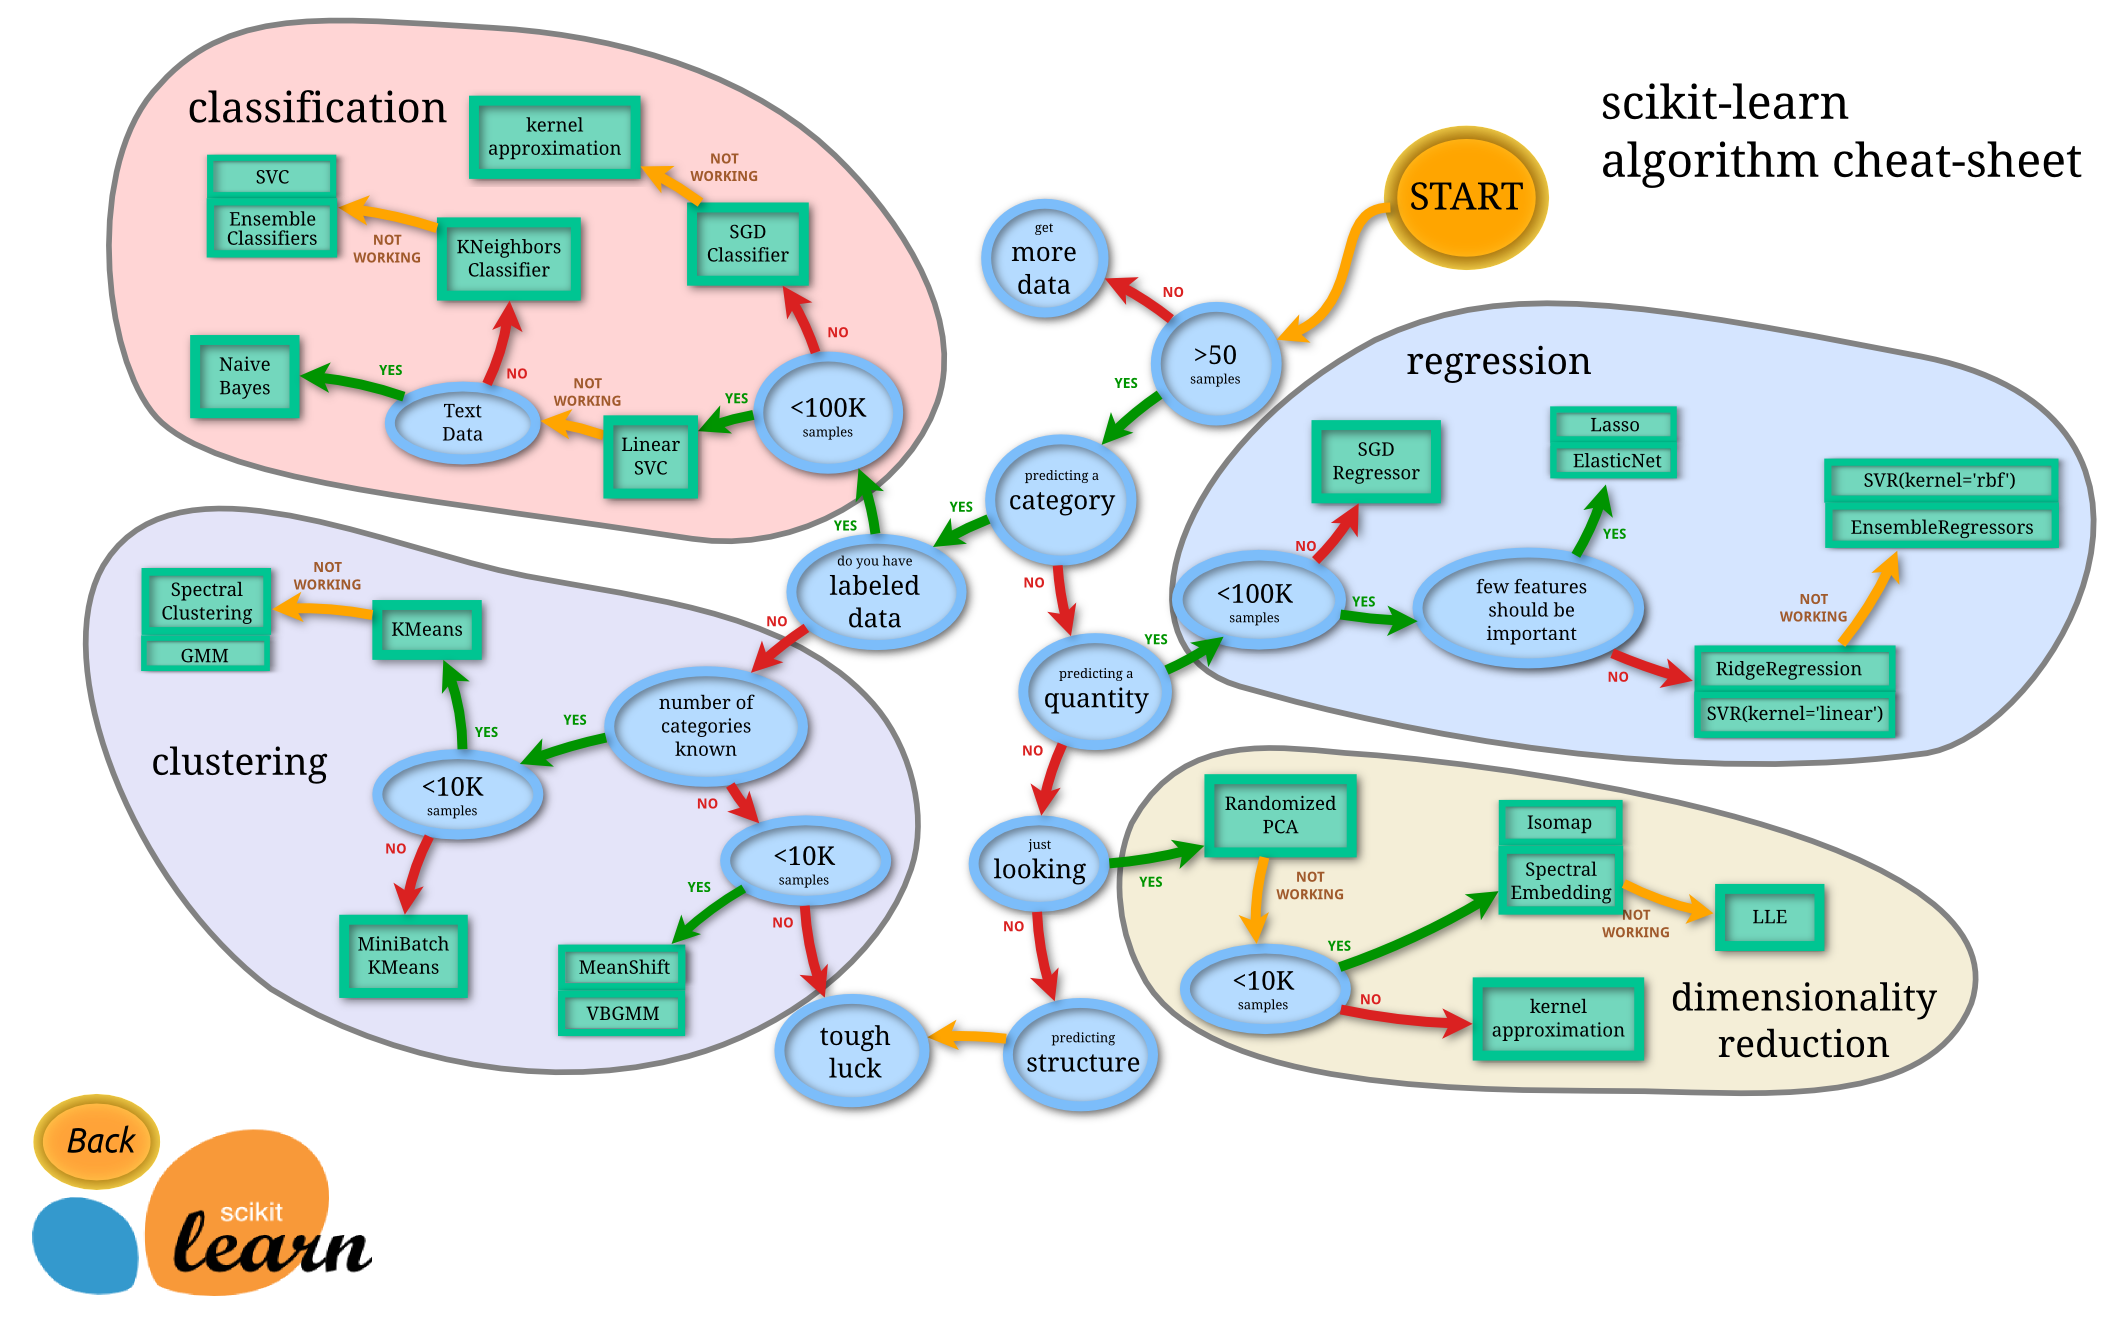

In [70]:
# Import algorithm
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df.target

# split into train ans test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model on the train set
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model on the test
model.score(X_test, y_test) # coeff of the determination R^2

0.5758549611440127

In [71]:
# EXERCISE : Trying another model
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, StackingRegressor
from sklearn.svm import SVR

lasso = Lasso(alpha=0.1)
elas_net = ElasticNet()
bag_reg = BaggingRegressor()
# stack_reg = StackingRegressor()
svr = SVR()

models = [lasso, elas_net, bag_reg, svr]

scores = {}

for i in models:
    i.fit(X_train, y_train)
    model_score = i.score(X_test, y_test)
    scores[i] = model_score
    
scores

{Lasso(alpha=0.1): 0.5318167610318159,
 ElasticNet(): 0.41655189098028234,
 BaggingRegressor(): 0.7842455475760138,
 SVR(): -0.01648536010717372}

In [72]:
# Ensembles Methods: combines the predictions on several models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8051230593157366

### 2.2 Picking a ML model for classification model 

In [73]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
len(heart_disease)

303

Consulting the sklearn map, it says to try a linearSVC

In [75]:
# trying a linear SVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

#Evaluate the linearSVC
clf.score(X_test, y_test)

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [76]:
heart_disease.target.value_counts()
# binary classification problem

1    165
0    138
Name: target, dtype: int64

In [77]:
# we try another one because of the warning
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis=1)
y= heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClass
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

#Evaluate the RandomForestClass
clf.score(X_test, y_test)

0.8688524590163934

1. If you have structere data use ensemble methods
- tables, df, exceL 

2. If you have unstructed data, use deep learning or transfer learning
- images, audio, text

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for: 
X = features, feature variables, data
y = labels, targets, target variables

In [78]:
# we try another one because of the warning
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

# split the data into X and y
X= heart_disease.drop("target", axis=1)
y= heart_disease.target

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClass
clf = RandomForestClassifier(n_estimators=1000)

#Training the ML model
clf.fit(X_train, y_train)

#Evaluate the RandomForestClass: use the patterns the model has achieved
clf.score(X_test, y_test)

0.8688524590163934

In [79]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [81]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [82]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [83]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this does not work

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [84]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [85]:
clf.predict(X_test) # predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [86]:
np.array([y_test]) # truth labels from original dataset
# also called y_true

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [87]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) # same as score!!

0.8688524590163934

In [88]:
clf.score(X_test, y_test) # same thing!!

0.8688524590163934

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) # same thing !!!

0.8688524590163934

Make predictions with `predict_proba()`

In [90]:
# Make predictions with predict_proba()
# predict_proba() - probabilities of a classification model
clf.predict_proba(X_test[:5])

# classes: not heart disease or with heart disease
#return the probability of that label being truth
#proba of 0 and 1, if proba is bigger than 50%, return this class

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ]])

In [91]:
# LEts predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [92]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [94]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [95]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [96]:
len(y_preds), len(y_test)

(4128, 4128)

In [97]:
# average difference between truth and predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) # +or - values compared to the target

0.32659871732073664

In [98]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a Model

Three ways to evaluate sklearn models/estimators

1. Estimator's built in `score()` method
2. the scoring parameter
3. Metric functions

### 4.1 Evaluating a model with the `score`method

In [99]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [100]:
clf.score(X_train, y_train) 
# it predicts 100% because it has seen it before
# generally the train is higher but still close to the test

1.0

In [101]:
clf.score(X_test, y_test)
# it has not seen these data before so the score is less
# the one that really matters is this one

0.8688524590163934

Lets use the `score`method in a regression problem

In [102]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor(n_estimators=80)

reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80)

In [103]:
reg.score(X_train, y_train)

0.9733671715271791

In [104]:
# the score evaluation metric is the r_square value for regression models
reg.score(X_test, y_test)

0.8052687735638526

### 4.2 Evaluating a model using the `scoring` parameter

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [106]:
#cross_val_score
clf.score(X_test, y_test) # returns a single number

0.8524590163934426

In [107]:
cross_val_score(clf, X, y, cv=10) # returns many numbers
# cv is the number of splits of the cross validation
# one score for each split

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

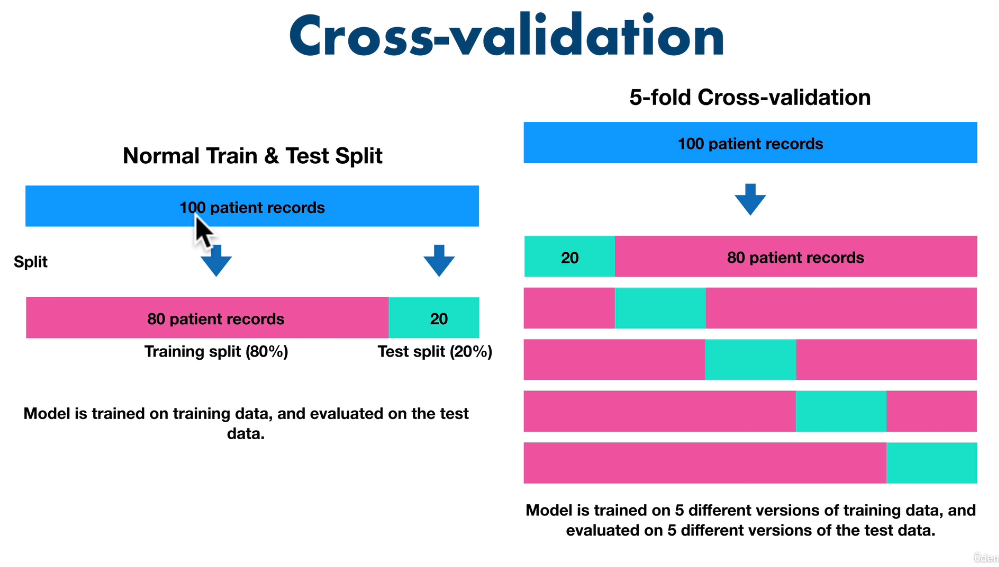

In [108]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of the 5-fold cross-val score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [109]:
# scoring parameters set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)
# is scoring=None - it uses the default scoring parametr of the estimator
# in this case is the mean average

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evalution metrics

1. Accuracy
2. Area unde ROC curve
3. Confusion matrix
4. Classification  report

#### Accuracy
no need for train test because we are using cross_val

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [111]:
np.mean(cross_val_score)

0.8248087431693989

In [112]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")
# mean between all the splits 

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operaing characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC comparison of a model(s true positive rate (tpr) versus a models false positive rate (fpr).

* true positive = model predicts when true is 1
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

In [113]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
# it will give us the probabilities of choosing 1 or 0 for each value of 
# X test

In [115]:
y_probs[:10], len(y_probs) # [0, 1]

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [116]:
y_probs_pos = y_probs[:,1]

In [117]:
# Calculate fpr, tpr and thresholds
# true positive = model predicts when true is 1
# false positive = model predicts 1 when truth is 0

fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos) 
# it will compare the probabilities of scoring 1 to 
#the real values for y

# Check the false positive rate
fpr
# does not make a lot of sense by itself

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [118]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [119]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

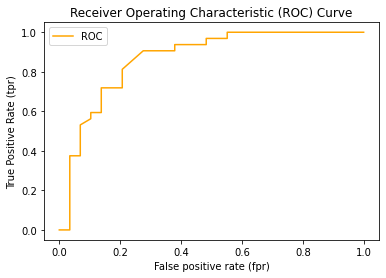

In [120]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positve rate (tpr) of a model.
    """
    # Plot roc curve    
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
#     plt.plot([0,1], [0,1], c='darkblue', linestyle='--',
#              label='Guessing')
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)
# area under curve!! under the roc curve in yellow

0.8669181034482759

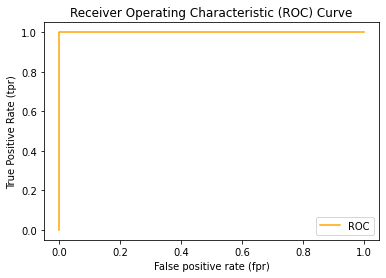

In [122]:
# Plot perfect ROC curve and AUX score

fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

# the perfect curve!

In [123]:
# Perfect AUX score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

Is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [124]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [125]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

# if predicted label is 0 and the true is 0 = 22
# if predicted label is 1 and the true is 1 = 24
# if predicted label is 0 and the true is 1 = 8 false negative
# if predicted label is 1 and the true is 0 = 7 false positive

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [126]:
22 + 7 + 8 + 24

61

In [127]:
y_preds.shape

(61,)

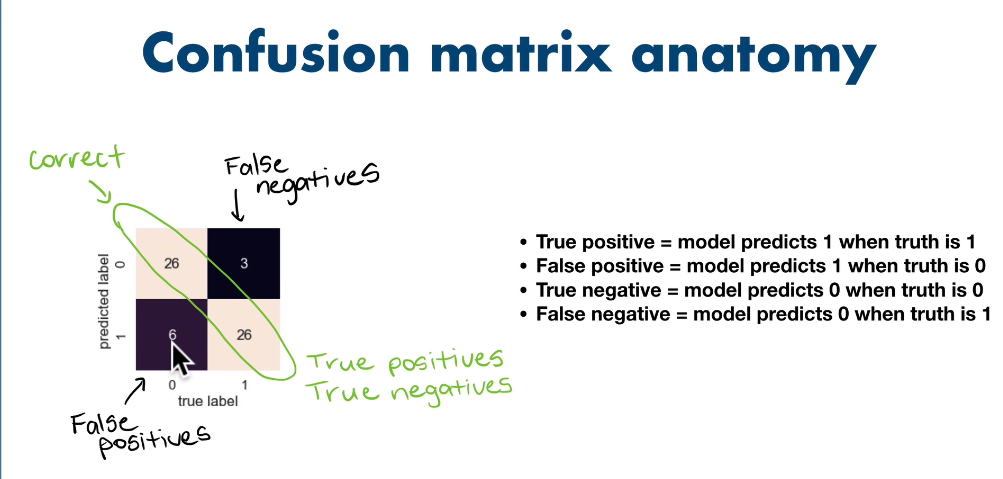

<AxesSubplot:>

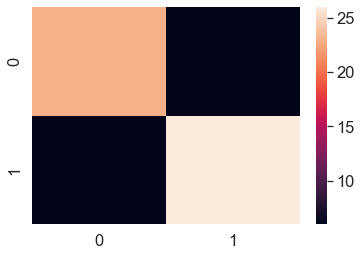

In [128]:
# Make our confusion matrix more visual with seaborn heatmap()
import seaborn as sns

# set the font scale 
sns.set(font_scale=1.5)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

### Creating a confusion matrix from sklearn

To use the new methods of creating a confusion matrix with sklearn
will will need sklearn version 1.0+

In [129]:
import sklearn
sklearn.__version__

'1.0.2'

In [130]:
clf

RandomForestClassifier()

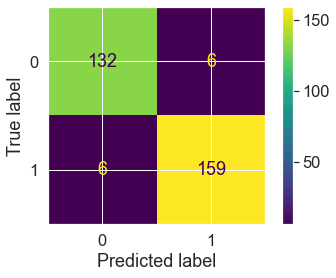

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
# makes the predictions for you!!!

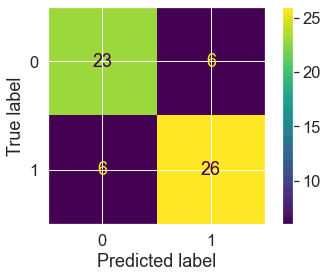

In [132]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

# precision - indicates the proportion of positive indentifications 
# (model predicts class 1) which are actually correct, max precision is 1

# recall - indicates the porportion of actual positives 
# which were correctly classified. - no false negatives has a recall of 1

# F1 score - a combination of the precision and recall. 
# Prefect model achieves an F1 sscore of 1

# support - how many samples the metrics were calculated in (number of samples)

# accuracy - accuracy of the model in decimal form, 
# perfect accuracy if equal to 1

#macro avf - short for macro average, the average precision, 
# recall and F1 score between classes, 
# does not take class imbalance into account good to check 
# if we have class imbalance
# what is class imbalance: amount of class 0 and 1

# weighted average: the weighted averagre precision, recall and F1 score
# between classes. weighted maens each metric is calculated with respect
# to how many samples there are in each class - gives high value when one class out 
# perfoms another due to having more smaples 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [134]:
# Where precision and recall become valuable
disease_true = np.zeros(10000) 
# we make a fake df in which I have many people that are not sick
disease_true[0] = 1 
# and there is only one person, one case positive

disease_preds = np.zeros(10000) 
# imagine now that the model predicts only case 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

# if very large class imbalance (like in this example)
# use other metrics than accuracy!
# espcially macro avg, check below!

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics

- **precision** - indicates the proportion of positive indentifications (model predicts class 1) which are actually correct, max precision is 1

- **recall** - indicates the porportion of actual positives which were correctly classified. - no false negatives has a recall of 1

- **F1 score** - a combination of the precision and recall. Prefect model achieves an F1 sscore of 1

- **support** - how many samples the metrics were calculated in (number of samples)

- **accuracy** - accuracy of the model in decimal form, perfect accuracy if equal to 1

- **macro avg** - short for macro average, the average precision, recall and F1 score between classes, does not take class imbalance into account good to check, if we have class imbalance what is class imbalance: amount of class 0 and 1

- **weighted average**: the weighted averagre precision, recall and F1 score, between classes. weighted maens each metric is calculated with respect, to how many samples there are in each class - gives high value when one class out perfoms another due to having more smaples 

### 4.2.2 Regression model evaluation metrics

The ones we are going to cover are :
1. $R^2$ (pronounced r-squared or coeff of determination: compares your models to the mean of the targets; values can vary from negative infinity for a very bad model, to 1 (perfect model).
2. Mean absolute error (MAE)
3. MEan squared error (MSE)

In [135]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
model.score(X_test, y_test)

0.8065734772187598

In [137]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [138]:
y_test.mean()

2.0550030959302323

In [139]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [140]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean, entire array with the average value
y_test_mean = np.full(len(y_test), y_test.mean())

In [141]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [142]:
r2_score(y_true=y_test, 
        y_pred=y_test_mean)

0.0

In [143]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [144]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)

**Mean squared error (MAE)**

MAE is the average of the absolute differences between predictions and actual values - gives an idea of how wrong your models predictions are

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_preds)
print(f"MAE is {MAE*100:.2f} %")

MAE is 32.95 %


In [146]:
df = pd.DataFrame(data={'actual values':y_test,
                 "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

df.head(10)

,actual values,predicted values,differences
10921,1.64100,1.628370,-0.012630
19572,0.99500,1.435760,0.440760
6350,2.73800,2.811970,0.073970
18025,2.34200,2.734700,0.392700
12120,1.35700,0.902160,-0.454840
18714,1.20100,1.812100,0.611100
7338,1.70500,1.586960,-0.118040
12010,1.98800,1.541000,-0.447000
15680,5.00001,4.501326,-0.498684
8625,4.74300,4.376723,-0.366277


In [147]:
df["differences"].mean() # includes the negative

0.01562165654069728

In [148]:
np.abs(df["differences"]).mean() # exatcly the MAE!!!

0.32951328255813966

In [149]:
(df["differences"].mean())**2

0.0002440361530755101

**Mean Squared Error**

MSE if the mean of the squared of the error between the actual and predicted values - we amplify the errors that are larger

In [150]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_preds)
print(f"MSE is {MSE*100:.2f} %")

MSE is 25.80 %


In [151]:
df["differences_squared"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,differences_squared
10921,1.641,1.62837,-0.01263,0.000160
19572,0.995,1.43576,0.44076,0.194269
6350,2.738,2.81197,0.07397,0.005472
18025,2.342,2.73470,0.39270,0.154213
12120,1.357,0.90216,-0.45484,0.206879


In [152]:
df["differences_squared"].mean() # same as MSE!!!

0.2579791311908462

In [153]:
df_large_error = df.copy()

df_large_error.iloc[0]["differences_squared"] = 16
df_large_error.head()

,actual values,predicted values,differences,differences_squared
10921,1.641,1.62837,-0.01263,16.000000
19572,0.995,1.43576,0.44076,0.194269
6350,2.738,2.81197,0.07397,0.005472
18025,2.342,2.73470,0.39270,0.154213
12120,1.357,0.90216,-0.45484,0.206879


In [154]:
# calculating MSE with large errors
df_large_error["differences_squared"].mean()

# it does not change so much! with one large error

0.2618550615404343

In [155]:
df_large_error = df.copy()

df_large_error.iloc[0]["differences_squared"] = 16

df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,differences_squared
10921,1.641,1.628370,-0.012630,16.000000
19572,20.000,20.000000,20.000000,20.000000
6350,20.000,20.000000,20.000000,20.000000
18025,20.000,20.000000,20.000000,20.000000
12120,20.000,20.000000,20.000000,20.000000
...,...,...,...,...
16229,0.874,1.339600,0.465600,0.216783
18161,4.068,3.703973,-0.364027,0.132516
7639,3.294,2.827150,-0.466850,0.217949
358,2.791,2.037200,-0.753800,0.568214


In [156]:
df_large_error["differences_squared"].mean() # penalizes much more the outliers

0.7336186994101132

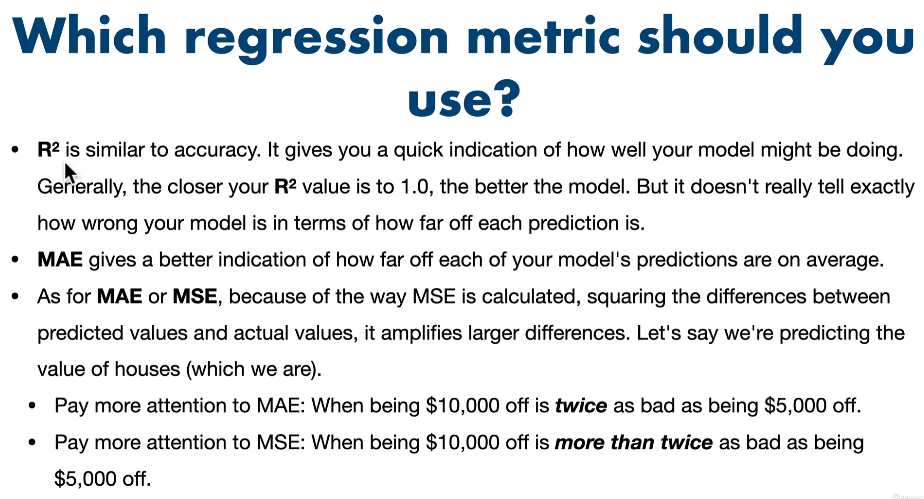

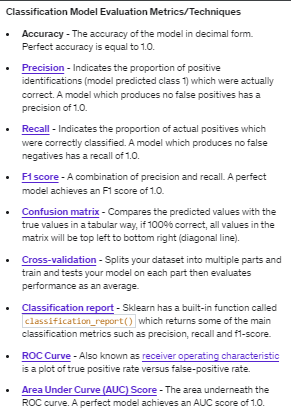

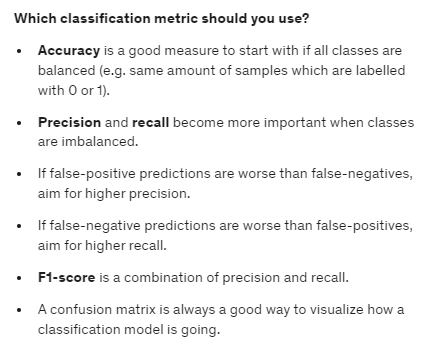

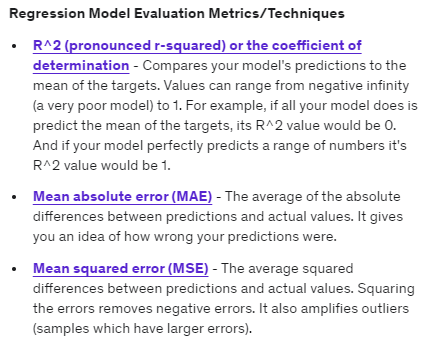

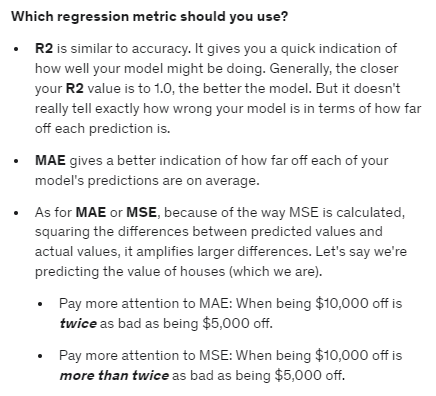

### 4.2.3 Finally using the scoring parameter

- 3 difference APIs for evaluating the quality of a model's prediction:

* Estimator score method
* Scoring parameter
* Metric functions

In [157]:
from sklearn.model_selection import cross_val_score 
#splitting in different pieces the Xtrain and ytrain and test
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier(n_estimators=100)

In [158]:
np.random.seed(42)

# Cross validation accuracy
# I dont put X_train and ytrain because its the CV that 
# will do the splits for you
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
# if scoring = None, estimators default scoring evaluting methods in used
# means accucary for classification model

cv_acc
# 5 different values, one score for each split of train test
# default is 5

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [159]:
# Crosss validated accuracy
print(f"The cross-validated accurecy if : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accurecy if : 82.48%


In [160]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [161]:
# Crosss validated accuracy
print(f"The cross-validated accurecy if : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accurecy if : 82.48%


In [162]:
# Lets try a different scoring metric

np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [163]:
# Crosss validated precision
print(f"The cross-validated precision if : {np.mean(cv_precision)}")

The cross-validated precision if : 0.8329547346025924


In [164]:
# Recall : indicates the proportion of actual positives
#which were correctly identified
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall
# way more homogeneous

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [165]:
# Crosss validated recall
print(f"The cross-validated recall if : {np.mean(cv_recall)}")

The cross-validated recall if : 0.8545454545454545


Let's see the **scoring parameter** being used for **regression problems**

In [166]:
from sklearn.model_selection import cross_val_score 
#splitting in different pieces the Xtrain and ytrain and test
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df.target

reg = RandomForestRegressor(n_estimators=100)

In [167]:
# Cross validation with R2
np.random.seed(42)
cv_r2 = cross_val_score(reg, X, y, cv=3, scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [168]:
# Crosss validated regression MAE
cv_reg_MAE = cross_val_score(reg, X, y, cv=3, 
                             scoring='neg_mean_absolute_error')
print("MAE", cv_reg_MAE)

# why negative neg_mean_asb_value?
# the higher the value the better the model for all models scoring
# returns a negative value of the MAE, so the higher, the better the model

MAE [-0.52258481 -0.424984   -0.50667074]


In [169]:
# Crosss validated regression MAE
print(f"The cross-validated regression MAE if : {np.mean(cv_reg_MAE)}")

The cross-validated regression MAE if : -0.48474651661821716


In [170]:
cv_reg_MSE = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error')
print("MSE", cv_reg_MSE)

# the best is -0.33! the higher the better

MSE [-0.51325643 -0.32925916 -0.54118007]


In [171]:
# Crosss validated regression MSE
print(f"The cross-validated regression MSE if : {np.mean(cv_reg_MSE)}")

The cross-validated regression MSE if : -0.4612318847966544


### 4.3 Using different evaluating method as Sklearn functions (Metric Functions)

The 3rd way to evaluate sklearn ML models/estimators is to ude the `sklearn.metrics`module


In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split the data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Predict y values
y_preds = clf.predict(X_test)

In [173]:
# Evaluate the model using the evaluating functions
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print("Classifier metrics on the test set")
print(f" accuracy is {accuracy*100:.2f}%\n precision is {precision:.2f}\n recall is {recall:.2f}\n f1 is {f1:.2f}")

Classifier metrics on the test set
 accuracy is 80.33%
 precision is 0.82
 recall is 0.77
 f1 is 0.79


In [174]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
reg = RandomForestRegressor()

# Fit model
reg.fit(X_train, y_train)

# Predict y values
y_preds = reg.predict(X_test)

In [175]:
y_preds

array([1.30011  , 2.6720414, 1.76655  , ..., 0.51028  , 1.30531  ,
       2.35245  ])

In [176]:
# Evaluate the model using the evaluating functions
r2 = r2_score(y_test, y_preds)
MAE = mean_absolute_error(y_test, y_preds)
MSE = mean_squared_error(y_test, y_preds)

print("Regression metrics on the test set")
print(f" r2 is {r2*100:.2f}%\n MAE is {MAE:.2f}\n MSE is {MSE:.2f}")

Regression metrics on the test set
 r2 is 80.54%
 MAE is 0.34
 MSE is 0.27


## 5. Improving a Model

First predictions = baseline predictions
First model = baseline model

How to improve the model?
From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve the data? (more features about it sample)

From a model perspective:
* Is there a better model we could use? (changing the model, using the fluxogram of sklearn, using a more complex model - ensemble models are more complex compared to the first ones in the path)
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = setting ona model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [177]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [178]:
clf.get_params() # shows hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning HP by hand

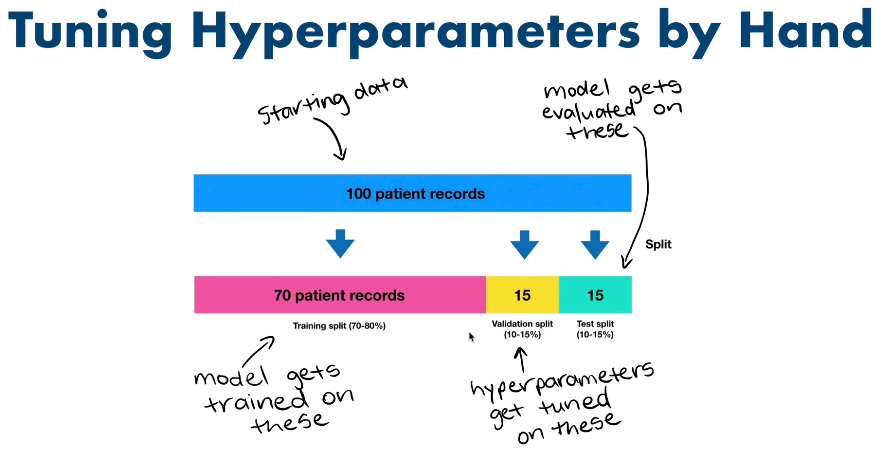

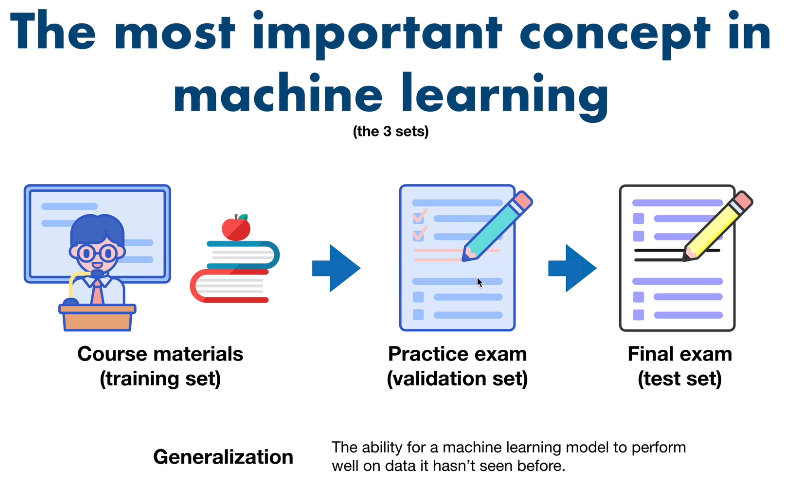

Lets make 3 sets, **training**, **validation** and **test**

- We are going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [179]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels 
    on a classifcations model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precison": round(precision, 2),
                  "recall": round(recall,2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [180]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split the data into train, validation and test
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train) # model gets trained/fitted with train sets

# Make baseline predictions
y_preds = clf.predict(X_valid) # model predicts/get tunned on the validation set

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 Score: 0.84


{'accuracy': 0.8, 'precison': 0.77, 'recall': 0.92, 'f1': 0.84}

In [181]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [182]:
np.random.seed(42)

# Create a second classifier with differents hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics_2 = evaluate_preds(y_valid, y_preds_2)
baseline_metrics_2

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


{'accuracy': 0.82, 'precison': 0.84, 'recall': 0.84, 'f1': 0.84}

In [183]:
np.random.seed(42)

# Create a second classifier with differents hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=1)
clf_3.fit(X_train, y_train)
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics_3 = evaluate_preds(y_valid, y_preds_3)
baseline_metrics_3

Acc: 80.00%
Precision: 0.79
Recall: 0.88
F1 Score: 0.83


{'accuracy': 0.8, 'precison': 0.79, 'recall': 0.88, 'f1': 0.83}

### 5.2 Hyperparameters tuning with RandomizedSearchCV

In [184]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Splitthe data into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # how much the computer process you want for this calculation

# Setup RandomizedSearchCV - cross validation - no need to create a val set youself
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2) # tells whats going on

# n_iter = it will try 10 times, iterate 10 times, with different combinations
# of the elements inside the dic grid

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [185]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [186]:
# Make predictions uding the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [187]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [188]:
6*5*3*3*2*5 # number of colbinations, times 5 because ofeach cv

2700

In [189]:
#reducing the HP, reduce the search space of HP
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [190]:
3*1*2*1*2*5 # number of parameters

60

In [191]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Splitthe data into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # how much the computer process you want for this calculation

# Setup GridSearchCV - cross validation - no need to create a val set youself
# no n_iter = gridsearch will try everything
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2,
                      cv=5,
                      verbose=2) # tells whats going on

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [192]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [193]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


Lets compare our different models metrics

<AxesSubplot:>

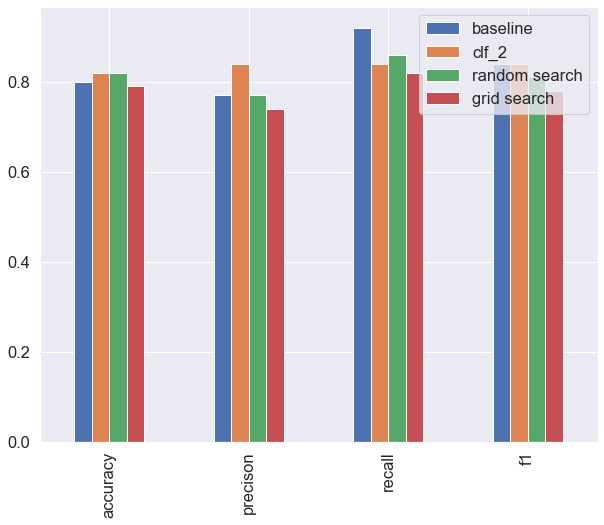

In [194]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": baseline_metrics_2,
                                "random search" : rs_metrics,
                                'grid search':gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models
1. With Python's `pickle`module
2. With the `joblib`module

**Pickle**

In [195]:
import pickle # python object structure is the model, to a pickle file

# Save an existing model to file , wb = write binary
pickle.dump(gs_clf, open("gs_randomforest_model1.pkl", "wb"))

In [196]:
# Load a saved model, rb = read binary
loaded_pickled_model = pickle.load(open("gs_randomforest_model1.pkl", "rb"))

In [197]:
# Make predictions
pickle_y_preds = loaded_pickled_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

In [198]:
evaluate_preds(y_test, gs_y_preds) # it is the same! it worked

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [199]:
# Using joblib to save models
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_randomforest_model1.joblib")

['gs_randomforest_model1.joblib']

In [200]:
loaded_joblib_model = load(filename="gs_randomforest_model1.joblib")

In [201]:
# Make predictions with joblib
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

In [202]:
evaluate_preds(y_test, gs_y_preds) # it is the same! it worked

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precison': 0.74, 'recall': 0.82, 'f1': 0.78}

**which one to use?**
joblib is best for objects with large numpy arrays

## 7. Putting it all together!!

PIPELINEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [203]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data # car sales with nan

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [204]:
data.dtypes # check which kind of data we have

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [205]:
data.isna().sum() # 50 nan values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do:

1. 1st - fill the missing data
2. 2nd - convert data to numbers
3. 3rd - build a model on the data

In [206]:
# Getting data ready - importing the classes
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling - functions to model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setup random seed - results reprodulcible
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_trabsformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Set up the preprocessing steps 
# (fill missing values than convert to numbers)
preprocessor = ColumnTransformer(transformers=[
                ("cat", categorical_transformer, categorical_features),
                ("door", door_transformer, door_feature),
                ("num", numeric_trabsformer, numeric_features)])

# Creating a preprocesing and modeling Pipeline
# putting the preprocessing steps together with the modeling steps
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Also possible to use `GridSearchCV` or `RandomizedSearchCV` with a `Pipeline`


Use GridSearchCV with our regression pipeline
"<span style='color:Blue'>preprocessor__</span><span style='color:Red'>num__</span><span style='color:Purple'>imputer__</span><span style='color:Green'>strategy</span>"

- it calls the preprocessor variable, with the strings on the beginning of every step above

<span style='color:Blue'>**preprocessor**</span> = ColumnTransformerransformers= 

   "cat", categorical_transformer, categorical_features), 

   "door", door_transformer, door_feature),               

   "<span style='color:Red'>**num**</span>", numeric_trabsformer, numeric_features)])

 numeric_trabsformer = Pipeline(steps=("<span style='color:Purple'>**imputer**</span>",SimpleImputer(<span style='color:Green'>**strategy**</span>="mean"))])

In [207]:
from sklearn.model_selection import GridSearchCV

# the grid calls the preprocessor varible, inside it there is the num string,
# that calls the numeric_trabsformer variable, that has inside another string
# imputer, that calls the strategy variable
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "meadian"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split" : [2, 4]
}
#model in the form of a pipeline
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [263]:
gs_model.score(X_test, y_test) # so from 22% to 33%

0.33139358107866